## Basic BOWTIE 2 alignment of reference databases to Atlantic cod genome


I want to practice working with alignment data AND see how many Korean / Alaskan loci will align to each other and the Atlantic cod genome, to get an idea of what I will be working with when trying to generate per-locus Fst v. distance along genome plots. 

In this notebook:
1. BOWTIE 2 alignment of Korean cod reference to Atlantic cod, Alaskan cod reference to Atlantic cod. 
2. Convert the .sam alignment files into indexed & sorted .bam files so that I can load the data into Integrative Genome Viewer (IGV). 
3. Learn how to use BEDTOOLS to align the alignment data! warning: it gets a little messy here because I was playing around with different settings, tags and file types. I also made the mistake of doing my first BEDTOOLS alignments with the loci that aligned to one or more places in the Atlantic cod genome, rather than filtering out those that aligned more than once. You can pretty much just skip this part. 
4. Find loci that aligned uniquely to Atlantic cod genome, then use BEDTOOLS to align those loci to each other. Filter for unique alignments. Convert BEDTOOLS output file (single file) to two separate .sam files for Alaskan and Korean Pacific cod. 


<br>
<br>
<br>
<br>


#### 8/1/2017



### (1a) Make BOWTIE 2 database from Atlantic cod genome
The Atlantic cod genome was downloaded from Ensembl, [here](ftp://ftp.ensembl.org/pub/release-89/fasta/gadus_morhua/dna). I chose the `.dna.toplevel.fa.gz`.


In [1]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Compare-repo/notebooks'

In [2]:
cd ../

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Compare-repo


In [3]:
ls

ACod_reference/  bowtie2-2.3.2/   fasta_inputs/  scripts/
blast_outputs/   bowtie_outputs/  notebooks/


In [4]:
cd ACod_reference

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Compare-repo/ACod_reference


In [5]:
ls

Gadus_morhua.1.bt2*                        Gadus_morhua.nin*
Gadus_morhua.2.bt2*                        Gadus_morhua.nog*
Gadus_morhua.3.bt2*                        Gadus_morhua.nsd*
Gadus_morhua.4.bt2*                        Gadus_morhua.nsi*
Gadus_morhua.gadMor1.dna.toplevel.fa*      Gadus_morhua.nsq*
Gadus_morhua.gadMor1.dna.toplevel.fa.fai*  Gadus_morhua.rev.1.bt2*
Gadus_morhua.nhr*                          Gadus_morhua.rev.2.bt2*


** BOWTIE 2 database files: end in `.bt2`.** See [this notebook](https://github.com/mfisher5/PCod-Compare-repo/blob/master/notebooks/Visualizing%20Alignments%20with%20IGV.ipynb) for creating BOWTIE 2 databases. Short code:


`!bowtie2-build \
ACod_reference/Gadus_morhua.gadMor1.dna.toplevel.fa \ #genome fasta file
ACod_reference/Gadus_morhua #where you want the database files to go`

<br>


### (1b) Retrieve fasta files from reference databases

The needed fasta files were produced when the reference databases were built. In my file structure, they are `batch_X_BOWTIE_BLAST_filtered.fa`

The Alaskan fasta file was created in [this notebook](https://github.com/mfisher5/PCod-US-repo/blob/master/notebooks/Stacks%20batch%202%20-%20nb2.ipynb). 


The Korean fasta file was created in [this notebook](https://github.com/mfisher5/PCod-Korea-repo/blob/master/notebooks/Stacks%20batch%206%20-%20nb%201.ipynb)
<br>


In [6]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Compare-repo/ACod_reference'

In [7]:
cd ../../PCod-US-repo/stacks_b2/refgenome

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/stacks_b2/refgenome


In [10]:
!cp batch_2_BOWTIE_BLAST_filtered.fa ../../../PCod-Compare-repo/fasta_inputs

In [11]:
cd ../../../PCod-Compare-repo/fasta_inputs

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Compare-repo/fasta_inputs


In [12]:
!mv batch_2_BOWTIE_BLAST_filtered.fa AKb2_filtered_refgenome.fa

In [14]:
cd ../../PCod-Korea-repo/stacks_b6/refgenome

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/stacks_b6/refgenome


In [15]:
!cp batch_6_BOWTIE_BLAST_filtered.fa ../../../PCod-Compare-repo/fasta_inputs

In [16]:
cd ../../../PCod-Compare-repo/fasta_inputs

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Compare-repo/fasta_inputs


In [17]:
!mv batch_6_BOWTIE_BLAST_filtered.fa KORb6_filtered_refgenome.fa

In [18]:
ls

AKb2_filtered_refgenome.fa*  KORb6_filtered_refgenome.fa*
AK_batch2_FinalFiltered.fa*  KOR_batch6_FinalFiltered.fa*




<br>
### (1c) Align the Korean and Alaskan files against the Atlantic cod database

In [19]:
cd ../

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Compare-repo


In [25]:
!bowtie2 -f \
-x ACod_reference/Gadus_morhua \
-U fasta_inputs/KORb6_filtered_refgenome.fa \
-S bowtie_outputs/KORb6_filtered_refgenome_BOWTIEto_ACod.sam

25214 reads; of these:
  25214 (100.00%) were unpaired; of these:
    3117 (12.36%) aligned 0 times
    19809 (78.56%) aligned exactly 1 time
    2288 (9.07%) aligned >1 times
87.64% overall alignment rate


In [26]:
!bowtie2 -f \
-x ACod_reference/Gadus_morhua \
-U fasta_inputs/AKb2_filtered_refgenome.fa \
-S bowtie_outputs/AKb2_filtered_refgenome_BOWTIEto_ACod.sam

19509 reads; of these:
  19509 (100.00%) were unpaired; of these:
    2369 (12.14%) aligned 0 times
    15187 (77.85%) aligned exactly 1 time
    1953 (10.01%) aligned >1 times
87.86% overall alignment rate



<br>
### (2) Convert to sorted and indexed `.bam` file

In [27]:
cd bowtie_outputs/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Compare-repo/bowtie_outputs


In [28]:
#sam to bam
!samtools view -bS KORb6_filtered_refgenome_BOWTIEto_ACod.sam > KORb6_filtered_refgenome_BOWTIEto_ACod.bam 

In [29]:
#sam to bam
!samtools view -bS AKb2_filtered_refgenome_BOWTIEto_ACod.sam > AKb2_filtered_refgenome_BOWTIEto_ACod.bam

In [30]:
#sort
!samtools sort KORb6_filtered_refgenome_BOWTIEto_ACod.bam -o KORb6_filtered_refgenome_BOWTIEto_ACod_sorted.bam

In [31]:
#sort
!samtools sort AKb2_filtered_refgenome_BOWTIEto_ACod.bam -o AKb2_filtered_refgenome_BOWTIEto_ACod_sorted.bam 

In [33]:
#index
!samtools index KORb6_filtered_refgenome_BOWTIEto_ACod_sorted.bam KORb6_filtered_refgenome_BOWTIEto_ACod_sorted.bai

In [34]:
#index
!samtools index AKb2_filtered_refgenome_BOWTIEto_ACod_sorted.bam AKb2_filtered_refgenome_BOWTIEto_ACod_sorted.bai



<br>
<br>

### (3) BEDtools / SAMtools

In addition to loading these sequences into IGV, I'm going to mess around with BEDtools and SAMtools to see if I can get some useful information out of these files. 

<br>
**`bedtools intersect`:** The BEDTools intersect subcommand computes the overlaps between two sets of ranges. I'm thinking I can use this to find the overlaps between Alaskan and Korean code alignments. while the examples use `.bed` files, the [documentation](http://bedtools.readthedocs.io/en/latest/content/general-usage.html) says that this particular command does support input in `.bam` format. 

If you are interested in converting from `.bam` to `.bed`, then you can just use the following line of code: 

`bedtools bamtobed -i File.bam >> File.bed`

In [ ]:
#install bedtools
sudo apt-get install bedtools

I'm going to attempt this with the optional settings that will write out the original entry for file A (-wa) and the original entry for file B (-wb) for each overlap. Note that I have to specify `.bed` output, otherwise the program will default to `.bam` output (input file type). With `.bam` output, you cannot use the option `-wb`. 

In [2]:
cd ../bowtie_outputs/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Compare-repo/bowtie_outputs


In [31]:
!bedtools intersect -a AKb2_filtered_refgenome_BOWTIEto_ACod.bam \ #query file
-b KORb6_filtered_refgenome_BOWTIEto_ACod.bam \ #database file
-wa \
-wb \
-names Korea \
-bed >> KORb6_AKb2_refgenomes_BOWTIEto_ACod_intersect.bed

In [33]:
!head KORb6_AKb2_refgenomes_BOWTIEto_ACod_intersect.bed

GeneScaffold_4551	470556	470647	35236	3	+	470556	470647	0,0,0	1	91,	0,	GeneScaffold_4551	470419	470560	403	40	-
GeneScaffold_4551	470556	470647	35236	3	+	470556	470647	0,0,0	1	91,	0,	GeneScaffold_4551	470556	470694	35529	0	+
GeneScaffold_377	418275	418367	35237	42	-	418275	418367	0,0,0	1	92,	0,	GeneScaffold_377	418225	418367	18655	42	-
GeneScaffold_2068	27560	27652	35234	39	-	27560	27652	0,0,0	1	92,	0,	GeneScaffold_2068	27648	27790	38400	21	+
GeneScaffold_2068	27560	27652	35234	39	-	27560	27652	0,0,0	1	92,	0,	GeneScaffold_2068	27510	27652	30181	21	-
GeneScaffold_2817	439946	440038	35235	40	-	439946	440038	0,0,0	1	92,	0,	GeneScaffold_2817	440034	440176	39202	42	+
GeneScaffold_2817	439946	440038	35235	40	-	439946	440038	0,0,0	1	92,	0,	GeneScaffold_2817	439896	440038	34146	40	-
contig546082	158	252	33017	1	-	158	252	0,0,0	1	94,	0,	contig546082	97	252	20687	0	-
GeneScaffold_77	32024	32115	35541	8	+	32024	32115	0,0,0	1	91,	0,	GeneScaffold_77	32024	32165	4662	23	+
GeneScaffold_77	32024	32115

How many total alignments were made? 

In [2]:
!grep "\n" KORb6_AKb2_refgenomes_BOWTIEto_ACod_intersect.bed | wc -l

21252


Interpreting `bedtools intersect` output: 



|   Chromosome/Scaffold Name   |   Start Position (KOR)  |   End Position (KOR)   |   BED name (KOR) | score 0-1000 (KOR) | strand (KOR) | thick start | thick end | item RGB | # exons | exon sizes | exon starts | Chromosome/Scaffold Name | Start Position (AK) | End Position (AK) | BED name (AK) | score 0-1000 (AK) | strand (AK) |
|:-----:|:-----:|:----:|:-----:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|GeneScaffold_4551	|470556	|470647	|35236	| 3	|+	 |470556	| 470647 |	0,0,0	| 1	| 91, |	0, | GeneScaffold_4551	| 470419	| 470560	| 403	| 40	| - |

Let's take a look at that location in IGV:

![img-igv-scaffold4551-overlap](https://github.com/mfisher5/PCod-Compare-repo/blob/master/notebooks/notebook_pics/IGV_AK_KOR_refgenomes_overlap_GeneScaffold4551.png?raw=true)


YESSSSS IT EXISTS!!!!! 

I also noticed quite a few other overlaps as I was scrolling through that scaffold. I think that I can check on the total number using `grep` on the `.bed` file. 

In [34]:
!grep "GeneScaffold_4551" KORb6_AKb2_refgenomes_BOWTIEto_ACod_intersect.bed | wc -l

22




<br>
<br>
<br>
Ok, now I want to know how many unique Alaskan sequences mapped to a single Korean locus. I think I'll just use python for this. 

#### 8/2/2017

Which sequences aligned to only one location?

|   Chromosome/Scaffold Name   |   Start Position (KOR)  |   End Position (KOR)   |   BED name (KOR) | score 0-1000 (KOR) | strand (KOR) | thick start | thick end | item RGB | # exons | exon sizes | exon starts |
|:-----:|:-----:|:----:|:-----:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|GeneScaffold_4551	|470556	|470647	|35236	| 3	|+	 |470556	| 470647 |	0,0,0	| 1	| 91, |	0, | 
| 0 | 1 | 2 |  3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 |



| Chromosome/Scaffold Name | Start Position (AK) | End Position (AK) | BED name (AK) | score 0-1000 (AK) | strand (AK) |
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|GeneScaffold_4551	| 470419	| 470560	| 403	| 40	| - |
| 12 |  13 | 14 | 15 | 16 | 17 |

In [5]:
cd ../bowtie_outputs

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Compare-repo/bowtie_outputs


In [6]:
infile = open("KORb6_AKb2_refgenomes_BOWTIEto_ACod_intersect.bed", "r")

#since my Alaskan sequences were the query, the dictionary will have the KEY as the ALASKAN BED name
ak_align_dict = {}

for line in infile:
    linelist = line.strip().split()
    kor = linelist[3]
    ak = linelist[15]
    if ak not in ak_align_dict.keys():
        ak_align_dict[ak] = [kor]
    elif ak in ak_align_dict.keys():
        kor_ids = ak_align_dict[ak]
        kor_ids.append(kor)
        ak_align_dict[ak] = kor_ids
infile.close()

In [7]:
print len(ak_align_dict.keys())

15854


I need to check to make sure that is correct ... what if the BED name isn't indicative of the actual sequence name? Lets see if I can use some code in bedtools that I took from [this thread](https://www.biostars.org/p/155015/). 

In [8]:
!bedtools intersect -wa -bed -a AKb2_filtered_refgenome_BOWTIEto_ACod.bam -b KORb6_filtered_refgenome_BOWTIEto_ACod.bam | sort | uniq > KORb6_AKb2_refgenomes_BOWTIEto_ACod_intersect_sort_unique.bed 

In [9]:
!grep "\n" KORb6_AKb2_refgenomes_BOWTIEto_ACod_intersect_sort_unique.bed | wc -l

13922


What if I use the flag "unique"?

In [11]:
!bedtools intersect -a AKb2_filtered_refgenome_BOWTIEto_ACod.bam \
-b KORb6_filtered_refgenome_BOWTIEto_ACod.bam \
-wa \
-wb \
-names Korea \
-u \
-bed >> KORb6_AKb2_refgenomes_BOWTIEto_ACod_intersect_unique.bed

In [12]:
!grep "\n" KORb6_AKb2_refgenomes_BOWTIEto_ACod_intersect_unique.bed | wc -l

13922


Well, at least I know that the flag "unique" and the pipe to "unique" do the same thing....

<br>
Crap - I just realized something. What if I need to go back to the original .sam files, filter out any sequences from BOWTIE 2 that aligned to the Atlantic cod genome more than once, and THEN use `bedtools intersect -u`?

<br>

### Unique alignments: Alaskan and Korean to Atlantic cod genome >> filter for unique alignments >> Alaskan and Korean cod to each other 

<br>
**filter out sequences that aligned to more than one location in the Atlantic cod genome**

I think that I can just do this with some bash lines that will remove any locus that appears more than once. I also need to remove the heading lines. 

In [21]:
!grep -v ^@ AKb2_filtered_refgenome_BOWTIEto_ACod.sam > AKb2_filtered_refgenome_BOWTIEto_ACod_nohead.sam

In [22]:
!grep -v ^@ KORb6_filtered_refgenome_BOWTIEto_ACod.sam > KORb6_filtered_refgenome_BOWTIEto_ACod_nohead.sam

In [24]:
!awk -F'|' 'NR==FNR{c[$3$4]++;next};c[$1$3$4] > 0' AKb2_filtered_refgenome_BOWTIEto_ACod_nohead.sam KORb6_filtered_refgenome_BOWTIEto_ACod_nohead.sam

**convert sam files to bam files**

In [25]:
#sam to bam
!samtools view -bS KORb6_filtered_refgenome_BOWTIEto_ACod_nohead.sam > KORb6_filtered_refgenome_BOWTIEto_ACod_nohead.bam 

[E::sam_parse1] missing SAM header
[W::sam_read1] Parse error at line 1
[main_samview] truncated file.


crap. let me go back and use python to concatenate the `no-head` unique files and the header from the original `.sam` file. 

In [27]:
infile = open("AKb2_filtered_refgenome_BOWTIEto_ACod_nohead.sam", "r") #this file has only unique loci, but no head
headerfile = open("AKb2_filtered_refgenome_BOWTIEto_ACod.sam", "r") #this file has all header lines
outfile = open("AKb2_filtered_refgenome_BOWTIEto_ACod_unique.sam", "w")

ref_seqs_retained = []
for line in infile:
    ref = line.strip().split()[2]
    if ref not in ref_seqs_retained:
        ref_seqs_retained.append(ref)
infile.close()

output = ""
for line in headerfile:
    if line.startswith("@"):
        linelist = line.strip().split(":")
        ref = linelist[1].split("\t")[0]
        if ref in ref_seqs_retained:
            outfile.write(line)
headerfile.close()

infile = open("AKb2_filtered_refgenome_BOWTIEto_ACod_nohead.sam", "r")
for line in infile:
    outfile.write(line)
infile.close()
outfile.close()


In [29]:
!samtools view -bS AKb2_filtered_refgenome_BOWTIEto_ACod_unique.sam > AKb2_filtered_refgenome_BOWTIEto_ACod_unique.bam 

In [30]:
infile = open("KORb6_filtered_refgenome_BOWTIEto_ACod_nohead.sam", "r")
headerfile = open("KORb6_filtered_refgenome_BOWTIEto_ACod.sam", "r")
outfile = open("KORb6_filtered_refgenome_BOWTIEto_ACod_unique.sam", "w")

ref_seqs_retained = []
for line in infile:
    ref = line.strip().split()[2]
    if ref not in ref_seqs_retained:
        ref_seqs_retained.append(ref)
infile.close()

output = ""
for line in headerfile:
    if line.startswith("@"):
        linelist = line.strip().split(":")
        ref = linelist[1].split("\t")[0]
        if ref in ref_seqs_retained:
            outfile.write(line)
headerfile.close()

infile = open("KORb6_filtered_refgenome_BOWTIEto_ACod_nohead.sam", "r")
for line in infile:
    outfile.write(line)
infile.close()
outfile.close()


In [31]:
!samtools view -bS KORb6_filtered_refgenome_BOWTIEto_ACod_unique.sam > KORb6_filtered_refgenome_BOWTIEto_ACod_unique.bam 

**use bedtools intersect with the -u flag**

Ok, so if I'm using bedtools correctly, this code will: 

1. Figure out which Alaskan loci map to the Korean loci
2. Only retain the first alignments for each Alaskan locus (In other words, just report the fact at least one overlap was found in B)
3. Return a file that contains not only the scaffold / contig name, but also the loci names of the Alaskan sequence that was aligned.

In [36]:
!bedtools intersect -a AKb2_filtered_refgenome_BOWTIEto_ACod_unique.bam \
-b KORb6_filtered_refgenome_BOWTIEto_ACod_unique.bam \
-wa \
-wb \
-u \
-bed >> KORb6_AKb2_refgenomes_BOWTIEto_ACod_unique_intersect_AKalignatleastonce.bed

**use bedtools intersect with the -wa -wb flag**

Ok, so if I'm using bedtools correctly, this code will: 

1. Figure out which Alaskan loci map to the Korean loci
3. Return a file that contains not only the scaffold / contig name, but also the loci names of the Alaskan sequence that was aligned (second) and the name of the Korean sequence that it aligned to (first).

In [37]:
!bedtools intersect -a AKb2_filtered_refgenome_BOWTIEto_ACod_unique.bam \
-b KORb6_filtered_refgenome_BOWTIEto_ACod_unique.bam \
-wa \
-wb \
-bed >> KORb6_AKb2_refgenomes_BOWTIEto_ACod_unique_intersect_all.bed

**remove Alaskan sequences that aligned to more than one Korean sequence (if this happened at all) from the `all` bed file**

|   Chromosome/Scaffold Name   |   Start Position (KOR)  |   End Position (KOR)   |   BED name (KOR) | score 0-1000 (KOR) | strand (KOR) | thick start | thick end | item RGB | # exons | exon sizes | exon starts |
|:-----:|:-----:|:----:|:-----:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|GeneScaffold_4551	|470556	|470647	|35236	| 3	|+	 |470556	| 470647 |	0,0,0	| 1	| 91, |	0, | 
| 0 | 1 | 2 |  3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 |



| Chromosome/Scaffold Name | Start Position (AK) | End Position (AK) | BED name (AK) | score 0-1000 (AK) | strand (AK) |
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|GeneScaffold_4551	| 470419	| 470560	| 403	| 40	| - |
| 12 |  13 | 14 | 15 | 16 | 17 |

In [1]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Compare-repo/notebooks'

In [2]:
cd ../bowtie_outputs/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Compare-repo/bowtie_outputs


In [3]:
infile = open("KORb6_AKb2_refgenomes_BOWTIEto_ACod_unique_intersect_all.bed", "r")

ak_loci_dict = {}
ak_kor_matches = {}

for line in infile:
    linelist= line.strip().split()
    aklocus = linelist[15]
    korlocus = linelist[3]
    if aklocus not in ak_loci_dict:
        ak_loci_dict[aklocus] = 1
        ak_kor_matches[aklocus] = [korlocus]
    elif aklocus in ak_loci_dict:
        count = ak_loci_dict[aklocus]
        count += 1
        ak_loci_dict[aklocus] = count
        korlist = ak_kor_matches[aklocus]
        korlist.append(korlocus)
        ak_kor_matches[aklocus] = korlist
infile.close()

In [4]:
matches_counts = []
for key in ak_loci_dict.keys():
    matches_counts.append(ak_loci_dict[key])

In [5]:
import numpy as np
import matplotlib.pyplot as plt

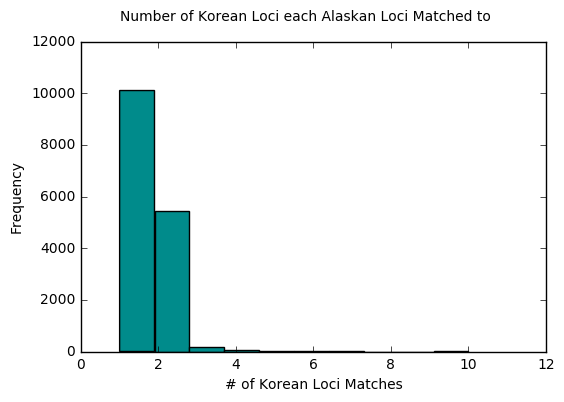

In [6]:
plt.hist(matches_counts, color = "darkcyan")
plt.suptitle("Number of Korean Loci each Alaskan Loci Matched to")
plt.xlabel("# of Korean Loci Matches")
plt.ylabel("Frequency")
plt.show()

In [7]:
plt.close()

In [10]:
# just to check to make sure that I'm doing this right...
print ak_kor_matches['403']

['35236']


yay!! It matches the first line of the file!!

Ok, so now I want a `.bed` file of only the loci that uniquely align. So I need to filter out by Alaskan locus. 

In [11]:
# make a list of the Alaskan loci that only matched to one Korean locus
unique_loci = []
duplicate_loci = []
for locus in ak_loci_dict.keys():
    if ak_loci_dict[locus] == 1:
        unique_loci.append(locus)
    elif ak_loci_dict[locus] != 1 and locus not in duplicate_loci:
        duplicate_loci.append(locus)

In [12]:
infile = open("KORb6_AKb2_refgenomes_BOWTIEto_ACod_unique_intersect_all.bed", "r")
unique_outfile = open("KORb6_AKb2_refgenomes_BOWTIEto_ACod_unique_intersect_all_filtered.bed", "w")
duplicate_outfile = open("KORb6_AKb2_refgenomes_BOWTIEto_ACod_unique_intersect_all_duplicates.bed", "w")

count = 0 

for line in infile:
    count += 1
    aklocus = line.strip().split()[15]
    if aklocus in unique_loci:
        unique_outfile.write(line)
    elif aklocus in duplicate_loci:
        duplicate_outfile.write(line)
    else:
        print "error processing locus ", aklocus, "on line ", count
infile.close()
unique_outfile.close()
duplicate_outfile.close()

In [13]:
!grep "\n" KORb6_AKb2_refgenomes_BOWTIEto_ACod_unique_intersect_all_filtered.bed | wc -l

9755


### So I end up with 9,755 loci present in both Alaskan and Korean reference genomes that align (1) uniquely to the Atlantic cod genome, and (2) overlap uniquely to each other.


<br>
<br>

**Let's take a look at the mapping quality scores:**

Mapping scores are in columns `4` and `16`. These are the mapping scores for aligning (1) Korean cod to Atlantic cod genome, and (2) Alaskan cod to Atlantic cod genome. 

Mapping quality scores are carried over from `bowtie 2`. Technically, the score (0-1000) given in a `.bed` file can be any string. However, Natalie and I did some research online and believe that the ones in the `bed intersect` output are from the original `.sam` files put out by `bowtie 2`. Some helpful links about mapping quality scores in `bowtie` and how they connect to the scores put out by `bedtools`: [this thread on bio.sourceforge.net](http://bowtie-bio.sourceforge.net/bowtie2/manual.shtml#the-bowtie2-aligner), [this thread on mapping v. alignment scores](http://seqanswers.com/forums/showthread.php?t=66634), the [bedtools manual- keyword search score](https://media.readthedocs.org/pdf/bedtools/latest/bedtools.pdf), and [this guy's bioinformatics blog](http://www.acgt.me/blog/2014/12/16/understanding-mapq-scores-in-sam-files-does-37-42). 


In [1]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Compare-repo/notebooks'

In [2]:
cd ../bowtie_outputs/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Compare-repo/bowtie_outputs


First, for the final filtered bed file

In [6]:
#open the filtered bed file
infile = open("KORb6_AKb2_refgenomes_BOWTIEto_ACod_unique_intersect_all_filtered.bed", "r")

kor_scores = []
ak_scores = []

#save each score in its respective list as a number
for line in infile: 
    linelist = line.strip().split()
    kor_scores.append(float(linelist[4]))
    ak_scores.append(float(linelist[16]))
infile.close()

In [7]:
import matplotlib.pyplot as plt
import numpy as np

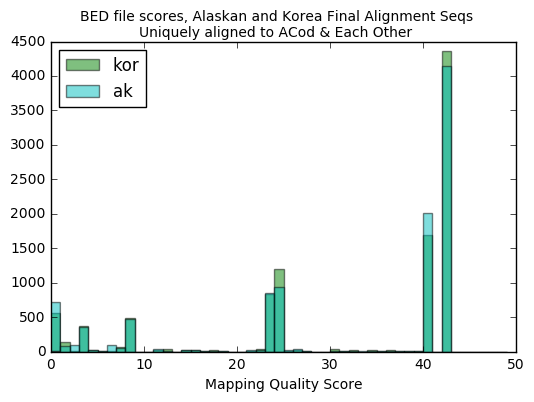

In [38]:
plt.hist(kor_scores,alpha = 0.5, bins = np.arange(0,50,1), color = "g", label = "kor")
plt.hist(ak_scores,alpha = 0.5, bins = np.arange(0,50,1), color = "c", label = "ak")
plt.legend(loc = "upper left")
plt.suptitle("BED file scores, Alaskan and Korea Final Alignment Seqs\nUniquely aligned to ACod & Each Other")
plt.xlabel("Mapping Quality Score")
plt.show()

In [39]:
plt.close()

Now I want to look at the `.sam` file output scores. 

In [16]:
infile = open("KORb6_filtered_refgenome_BOWTIEto_ACod_unique.sam", "r")

mapqual_kor = []

for line in infile:
    if not line.startswith("@"):
        score = line.strip().split()[4]
        mapqual_kor.append(float(score))
infile.close()

infile = open("AKb2_filtered_refgenome_BOWTIEto_ACod_unique.sam", "r")

mapqual_ak = []

for line in infile:
    if not line.startswith("@"):
        score = line.strip().split()[4]
        mapqual_ak.append(float(score))
infile.close()

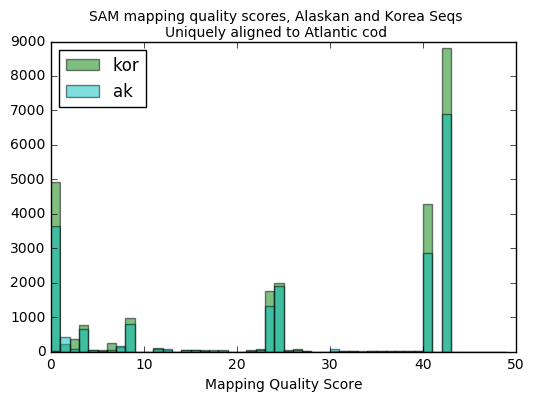

In [40]:
plt.hist(mapqual_kor,alpha = 0.5, bins = np.arange(0,50,1), color = "g", label = "kor")
plt.hist(mapqual_ak,alpha = 0.5, bins = np.arange(0,50,1), color = "c", label = "ak")
plt.suptitle("SAM mapping quality scores, Alaskan and Korea Seqs\nUniquely aligned to Atlantic cod")
plt.xlabel("Mapping Quality Score")
plt.legend(loc = "upper left")
plt.show()

In [41]:
plt.close()

Ok, so which of these reads are believably mapped? What does the quality score actually mean?

In [42]:
x = np.linspace(0.00001,1,10000)
y = -10*np.log10(x)

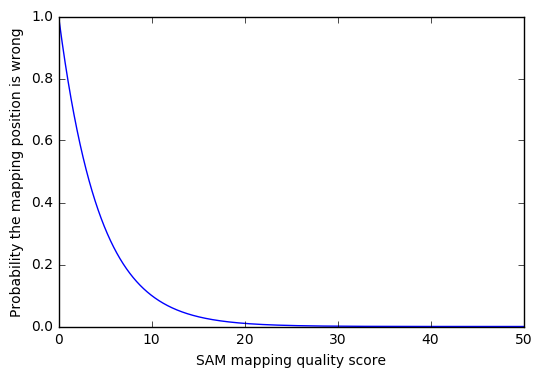

In [43]:
plt.plot(y,x)
plt.ylabel("Probability the mapping position is wrong")
plt.xlabel("SAM mapping quality score")
plt.show()

In [44]:
plt.close()

### Create `.sam` files that only contain the Korean or Alaskan loci from the 9,755 sequences above.


|   Chromosome/Scaffold Name   |   Start Position (KOR)  |   End Position (KOR)   |   BED name (KOR) | score 0-1000 (KOR) | strand (KOR) | thick start | thick end | item RGB | # exons | exon sizes | exon starts |
|:-----:|:-----:|:----:|:-----:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|GeneScaffold_4551	|470556	|470647	|35236	| 3	|+	 |470556	| 470647 |	0,0,0	| 1	| 91, |	0, | 
| 0 | 1 | 2 |  3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 |



| Chromosome/Scaffold Name | Start Position (AK) | End Position (AK) | BED name (AK) | score 0-1000 (AK) | strand (AK) |
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|GeneScaffold_4551	| 470419	| 470560	| 403	| 40	| - |
| 12 |  13 | 14 | 15 | 16 | 17 |

In [21]:
cd ../bowtie_outputs/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Compare-repo/bowtie_outputs


In [22]:
#open the filtered bed file
infile = open("KORb6_AKb2_refgenomes_BOWTIEto_ACod_unique_intersect_all_filtered.bed", "r")
#open the sam files that contain loci with unique alignments to the ACod genome
aksam_in = open("AKb2_filtered_refgenome_BOWTIEto_ACod_unique.sam", "r")
korsam_in = open("KORb6_filtered_refgenome_BOWTIEto_ACod_unique.sam", "r")
#open new sam files that will contain loci with unique alignments to ACod genome AND to opposite PCod population.
aksam_out = open("AKb2_filtered_refgenome_BOWTIEto_ACod_unique_BEDtoKOR_filtered.sam", "w")
korsam_out = open("KORb6_filtered_refgenome_BOWTIEto_ACod_unique_BEDtoAK_filtered.sam", "w")
#open new sam files that will contain loci filtered out because they do not align to the other PCod population.
aksam_out_bad = open("AKb2_filtered_refgenome_BOWTIEto_ACod_unique_BEDtoKOR_filteredOUT.sam", "w")
korsam_out_bad = open("KORb6_filtered_refgenome_BOWTIEto_ACod_unique_BEDtoAK_filteredOUT.sam", "w")


count = 0 


#initiate lists for each PCod locus to keep in main text of sam file, 
#and each corresponding ACod locus to keep in heading of sam file
akloci_list = []
korloci_list = []
akref_list = []
korref_list = []

#add to each list based on final filtered bed file
for line in infile:
    count += 1
    linelist = line.strip().split()
    aklocus = linelist[15]
    akloci_list.append(aklocus)
    korlocus = linelist[3]
    korloci_list.append(korlocus)
    korref = linelist[0]
    korref_list.append(korref)
infile.close()

#go through the alaskan sam input file and write out only those lines corresponding to PCod / ACod loci found above
#Version 2: get references needed from sam file lines
maintext = ""
maintext_bad = ""
akref_list = []
for line in aksam_in:
    if not line.startswith("@"):
        if line.strip().split()[0] in akloci_list:
            maintext += line
            ref = line.strip().split()[2]
            akref_list.append(ref)
        else:
            maintext_bad += line
aksam_in.close()

aksam_in = open("AKb2_filtered_refgenome_BOWTIEto_ACod_unique.sam", "r")
header = ""
header_bad = ""
refs_split = []
for line in aksam_in:
    if line.startswith("@"):
        linelist = line.strip().split(":")
        ref = linelist[1].split("\t")[0]
        refs_split.append(ref)
        if ref in akref_list:
            header += line
        else:
            header_bad += line
aksam_out.write(header + maintext)
aksam_out_bad.write(header_bad + maintext_bad)
aksam_out.close()
aksam_out_bad.close()

#go through the korean sam input file and write out only those lines corresponding to PCod / ACod loci found above
#Version 1: get references needed from bed file lines
for line in korsam_in:
    if line.startswith("@"):
        linelist = line.strip().split(":")
        ref = linelist[1].split("\t")[0]
        if ref in korref_list:
            korsam_out.write(line)
        else:
            korsam_out_bad.write(line)
    else:
        if line.strip().split()[0] in korloci_list:
            korsam_out.write(line)
        else:
            korsam_out_bad.write(line)
korsam_in.close()
korsam_out.close()
korsam_out_bad.close()

In [24]:
#make sure every reference name included in the main text of the file is also in the header
infile = open("AKb2_filtered_refgenome_BOWTIEto_ACod_unique_BEDtoKOR_filtered.sam", "r")

refs_needed = []

for line in infile:
    if not line.startswith("@"):
        refs_needed.append(line.strip().split()[2])
infile.close()


        
infile = open("AKb2_filtered_refgenome_BOWTIEto_ACod_unique_BEDtoKOR_filtered.sam", "r")

refs_included = []

for line in infile:
    if line.startswith("@"):
        linelist = line.strip().split(":")
        ref = linelist[1].split("\t")[0]
        refs_included.append(ref)
infile.close()


mismatch = 0
for ref in refs_needed:
    if ref not in refs_included:
        mismatch += 1
print "You are missing ", mismatch, " reference sequences from your header."


You are missing  430  reference sequences from your header.


In [20]:
#make sure every reference name included in the main text of the file is also in the header
infile = open("KORb6_filtered_refgenome_BOWTIEto_ACod_unique_BEDtoAK_filtered.sam", "r")

refs_needed = []

for line in infile:
    if not line.startswith("@"):
        refs_needed.append(line.strip().split()[2])
infile.close()


        
infile = open("KORb6_filtered_refgenome_BOWTIEto_ACod_unique_BEDtoAK_filtered.sam", "r")

refs_included = []

for line in infile:
    if line.startswith("@"):
        linelist = line.strip().split(":")
        ref = linelist[1].split("\t")[0]
        refs_included.append(ref)
infile.close()


mismatch = 0
for ref in refs_needed:
    if ref not in refs_included:
        mismatch += 1
print "You are missing ", mismatch, " reference sequences from your header."

You are missing  958  reference sequences from your header.


In [29]:
#sam to bam
!samtools view -bS AKb2_filtered_refgenome_BOWTIEto_ACod.sam > AKb2_filtered_refgenome_BOWTIEto_ACod.bam

In [30]:
#sort
!samtools sort KORb6_filtered_refgenome_BOWTIEto_ACod.bam -o KORb6_filtered_refgenome_BOWTIEto_ACod_sorted.bam

In [31]:
#sort
!samtools sort AKb2_filtered_refgenome_BOWTIEto_ACod.bam -o AKb2_filtered_refgenome_BOWTIEto_ACod_sorted.bam 

In [33]:
#index
!samtools index KORb6_filtered_refgenome_BOWTIEto_ACod_sorted.bam KORb6_filtered_refgenome_BOWTIEto_ACod_sorted.bai

In [34]:
#index
!samtools index AKb2_filtered_refgenome_BOWTIEto_ACod_sorted.bam AKb2_filtered_refgenome_BOWTIEto_ACod_sorted.bai